In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

employee_datas = pd.read_excel("Employee Data.xlsx")
employee_datas.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [42]:
segregation_of_duties = employee_datas.copy()

segregation_of_duties = segregation_of_duties[['Department','Business Unit','Age','Annual Salary']]
segregation_of_duties

,Department,Business Unit,Age,Annual Salary
0,IT,Research & Development,55,141604
1,IT,Manufacturing,59,99975
2,Finance,Speciality Products,50,163099
3,IT,Manufacturing,26,84913
4,Finance,Manufacturing,55,95409
...,...,...,...,...
995,Marketing,Speciality Products,33,98427
996,Finance,Speciality Products,44,47387
997,Marketing,Speciality Products,31,176710
998,Finance,Speciality Products,33,95960


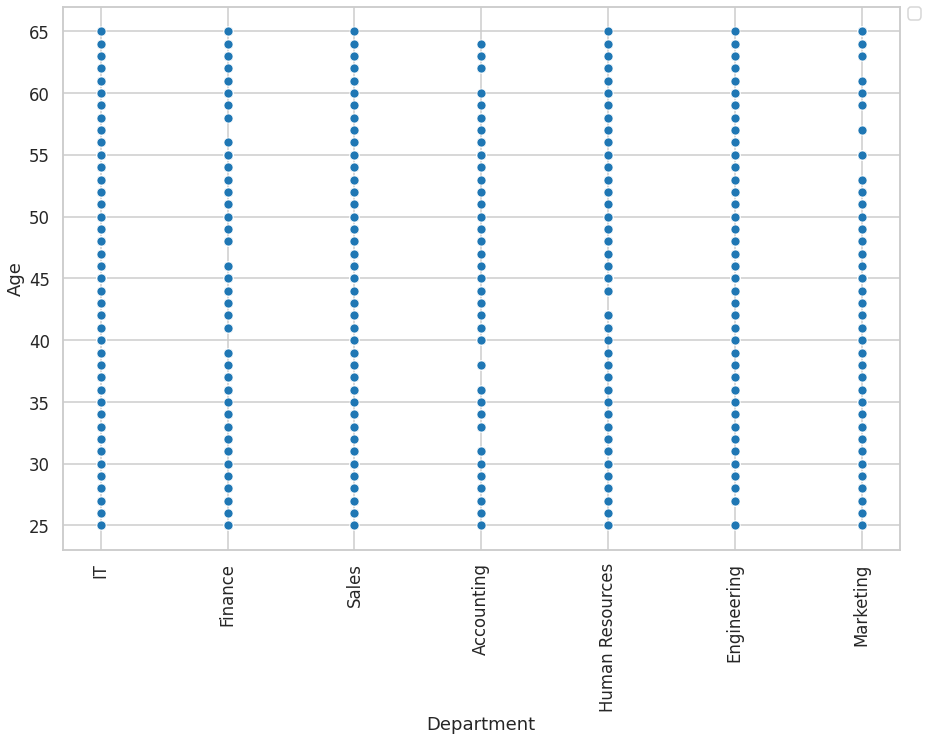

In [45]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,10))

sgs = sns.scatterplot(x='Department' , y='Age' , data=segregation_of_duties , palette='Paired' , hue_order=segregation_of_duties)
sgs.set_xticklabels(segregation_of_duties['Department'].unique().tolist(), rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, loc='upper left')
plt.show()

In [51]:
segregation_of_duties_source = employee_datas.copy()
segregation_of_duties_source = segregation_of_duties_source[['Department','Annual Salary','Business Unit']]
segregation_of_duties_source = segregation_of_duties_source.groupby(['Department','Business Unit'])['Annual Salary'].sum().to_frame(name='Total Transactions')
segregation_of_duties_source

Total Transactions
Department      Business Unit                             
Accounting      Corporate                          2794915
                Manufacturing                      3223277
                Research & Development             2126992
                Speciality Products                3676923
Engineering     Corporate                          3812404
                Manufacturing                      3969912
                Research & Development             4161646
                Speciality Products                5283601
Finance         Corporate                          5179067
                Manufacturing                      2622179
                Research & Development             3356590
                Speciality Products                3578511
Human Resources Corporate                          3658535
                Manufacturing                      3630847
                Research & Development             2845737
                Speciality Products                4622186
IT              Corporate                          5052094
                Manufacturing                      7428581
                Research & Development             5990757
                Speciality Products                5096067
Marketing       Corporate                          4332825
                Manufacturing                      3127592
                Research & Development             3655435
                Speciality Products                4443712
Sales           Corporate                          3794108
                Manufacturing                      3879831
                Research & Development             3623100
                Speciality Products                4249941